In [135]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [107]:
import pandas as pd
games=pd.read_csv("video_games.csv", sep=",")
games.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


Claramente, a coluna "summary" em nada nos vai ser util para a análise do nosso trabalho, e portanto iremos removê-la...

In [108]:
games.drop('summary', axis=1, inplace=True)  

De seguida iremos verificar se há jogos que estão duplicados, ou seja, se há jogos com o mesmo ID e, caso haja iremos removê-los... Vamos também verificar se ha jogos que não foram avaliados , ou seja, se ha jogos no nosso dataset com "n_user_reviews" a 0.

In [109]:
# Verificar se há jogos que estão repetidos
duplicated_names = games.duplicated(subset=['id'])
print(f'Número de jogos duplicados com o mesmo ID: {duplicated_names.sum()}')



Número de jogos duplicados com o mesmo ID: 0


In [110]:
zero_reviews = games[games['n_user_reviews'] == 0]

# print the filtered games
print(zero_reviews)

Empty DataFrame
Columns: [id, name, category, n_dlcs, n_expansions, year, follows, in_franchise, genres, companies, platforms, user_score, user_rating, n_user_reviews]
Index: []


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
#agora verifiquemos se há NaN values no nosso dataset
games.isnull().sum() 

id                 0
name               0
category           0
n_dlcs             0
n_expansions       0
year               0
follows            0
in_franchise       0
genres            21
companies         43
platforms          0
user_score         0
user_rating        0
n_user_reviews     0
dtype: int64

In [113]:
#há, portanto vamos removê-los
games=games.dropna()

Vamos agora procurar por outliers  no nosso dataset...

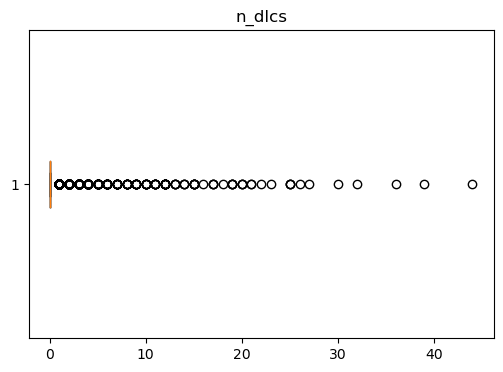

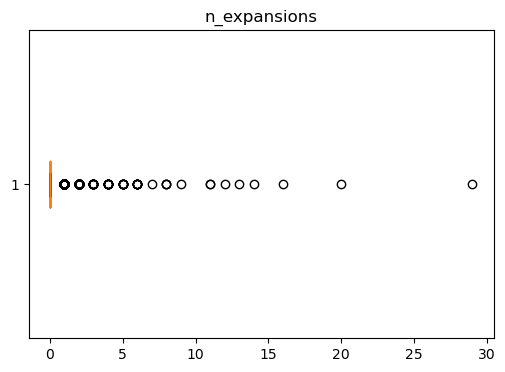

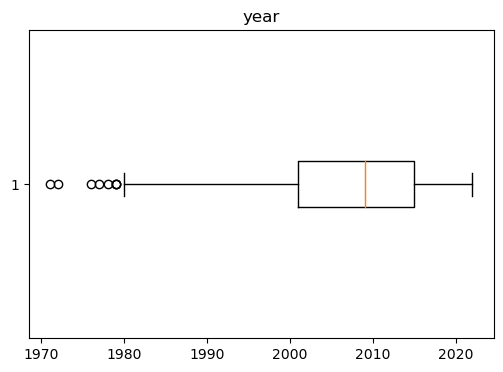

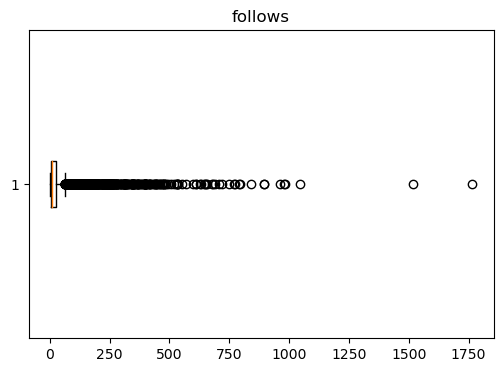

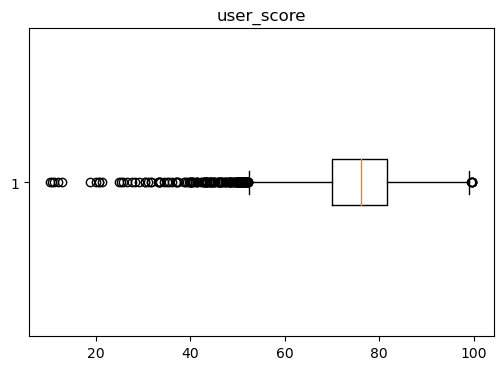

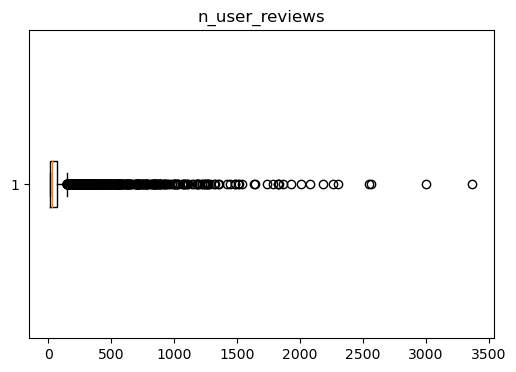

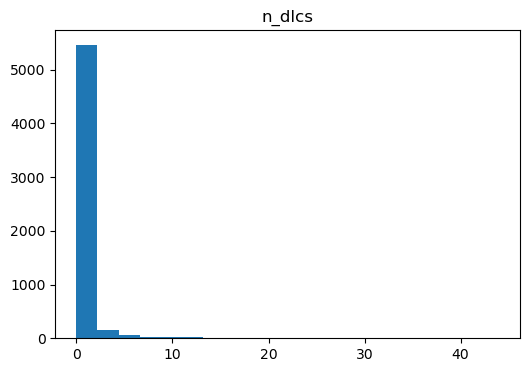

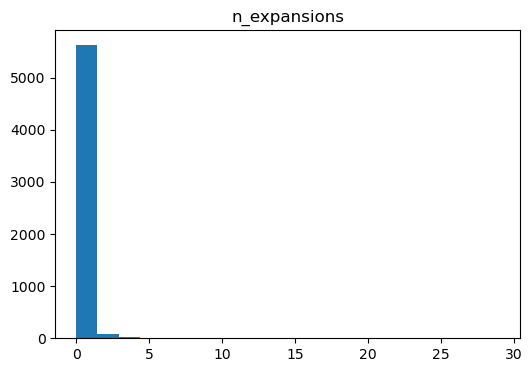

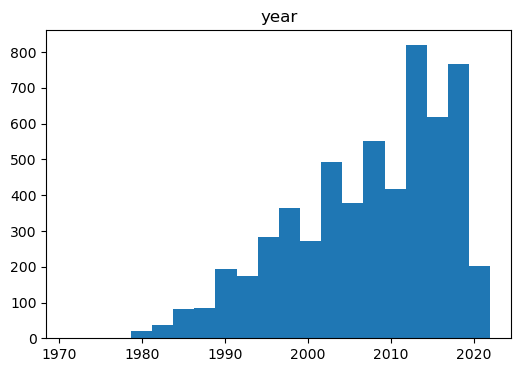

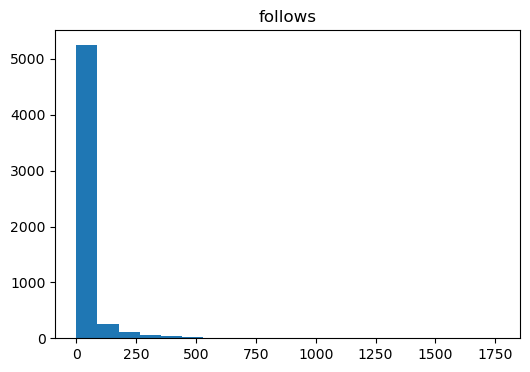

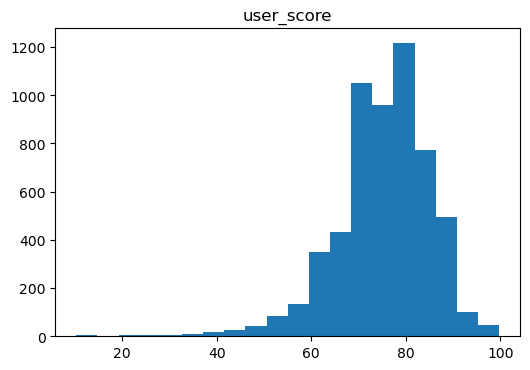

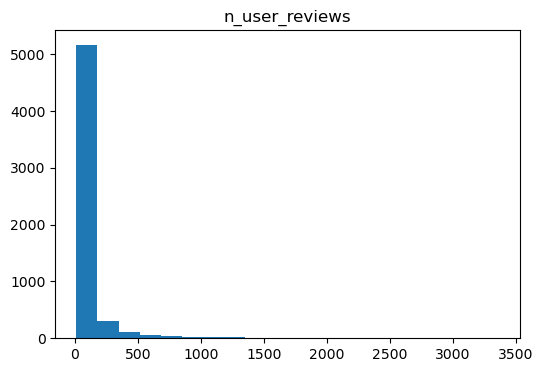

In [114]:
import matplotlib.pyplot as plt
num_vars = ['n_dlcs', 'n_expansions', 'year', 'follows', 'user_score', 'n_user_reviews']

# Verificar a presença de outliers em cada variável numérica usando boxplots
for var in num_vars:
    plt.figure(figsize=(6,4))
    plt.boxplot(games[var], vert=False)
    plt.title(var)
    plt.show()

# Verificar a presença de outliers em cada variável numérica usando histogramas
for var in num_vars:
    plt.figure(figsize=(6,4))
    plt.hist(games[var], bins=20)
    plt.title(var)
    plt.show()

Nenhum dado pareceu anormal ou fora dos parametros daquilo que era previsto, prossigamos...
Há colunas do nosso dataset como "genres" e "companies" que têm uma imensidão de tipos de generos/empresas categorica o  que pode tornar dificil a analise do mesmo... Iremos proceder à codificação de variáveis categóricas usando o LabelEncoder e criar um novo dataframe chamado features que contém as variáveis codificadas. No caso da coluna "genres" iremos proceder a uma codificação numerica por clusterização usando o K-Means (só para variar nos metodos utilizados)

O numero de cluster foi calculado  através do método de silhueta,  uma técnica amplamente utilizada para determinar o número ideal de clusters numa análise de clusterização.

In [115]:
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



# Verifica se o valor é uma string e separa os gêneros
generos = []
for linha in games['genres']:
    if isinstance(linha, str):
        generos += linha.split(',')

# Conta a frequência de cada gênero e armazena em um dicionário
freq_generos = dict(Counter(generos))

# Transforma os gêneros em uma matriz binária
mlb = MultiLabelBinarizer()
generos_jogos_bin = mlb.fit_transform(games['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else []))

# Verifica se há gêneros identificados
if generos_jogos_bin.shape[1] == 0:
    print("Nenhum gênero identificado nos dados. Verifique a coluna 'genres'.")

else:
    # Instancia o objeto KMeans com 50 clusters
    kmeans = KMeans(n_clusters=65, random_state=42)
    clusters = kmeans.fit_predict(generos_jogos_bin)

    # Adiciona as etiquetas de cluster ao dataframe games
    games['genres'] = clusters
    print(clusters)

    # Calcula o coeficiente de silhueta para cada amostra
    silhouette_vals = silhouette_samples(generos_jogos_bin, clusters)

    # Calcula a pontuação média de silhueta para os clusters
    silhouette_avg = silhouette_score(generos_jogos_bin, clusters)

    print("A pontuação média de silhueta é:", silhouette_avg)

[10  3  3 ... 24 33 13]
A pontuação média de silhueta é: 0.5325322062324856


In [116]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
label1=Label.fit_transform(games['category'])
label2=games['n_dlcs']
label3=games['n_expansions']
label4=games['year']
label5=games['follows']
label6=Label.fit_transform(games['in_franchise'])

label8=Label.fit_transform(games['companies'])
label9=Label.fit_transform(games['platforms'])
target=games['user_rating']
features=pd.DataFrame(list(zip(label1,label2,label3,label4,label5,
                               label6,label8,label9,target)),
                      columns=['category','n_dlcs','n_expansions','year','follows','in_franchise','companies','platforms','user_rating'])

Procedamos à visualização de algumas relações entre dados do dataset...

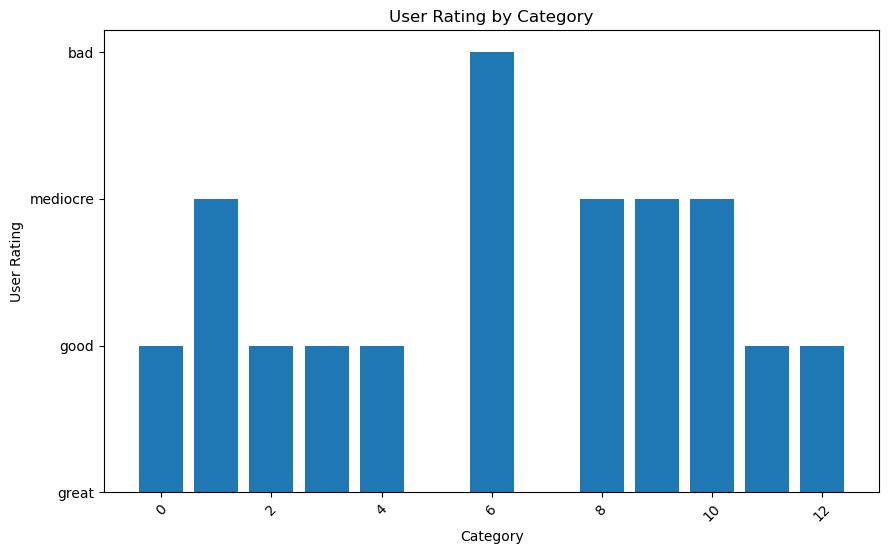

In [117]:
import matplotlib.pyplot as plt

# Gráfico de barras para a variável 'category'
plt.figure(figsize=(10, 6))
plt.bar(features['category'], features['user_rating'])
plt.xlabel('Category')
plt.ylabel('User Rating')
plt.title('User Rating by Category')
plt.xticks(rotation=45)
plt.show()

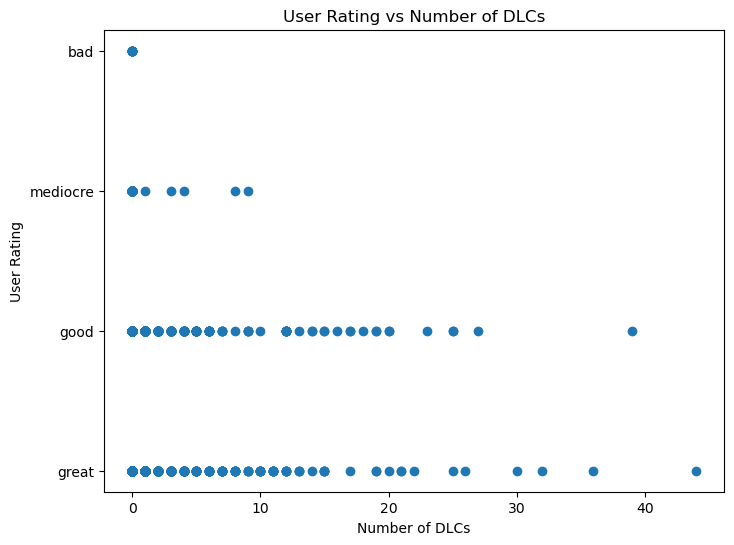

In [118]:
# Gráfico de dispersão para a variável 'n_dlcs' em relação à variável alvo
plt.figure(figsize=(8, 6))
plt.scatter(features['n_dlcs'], features['user_rating'])
plt.xlabel('Number of DLCs')
plt.ylabel('User Rating')
plt.title('User Rating vs Number of DLCs')
plt.show()

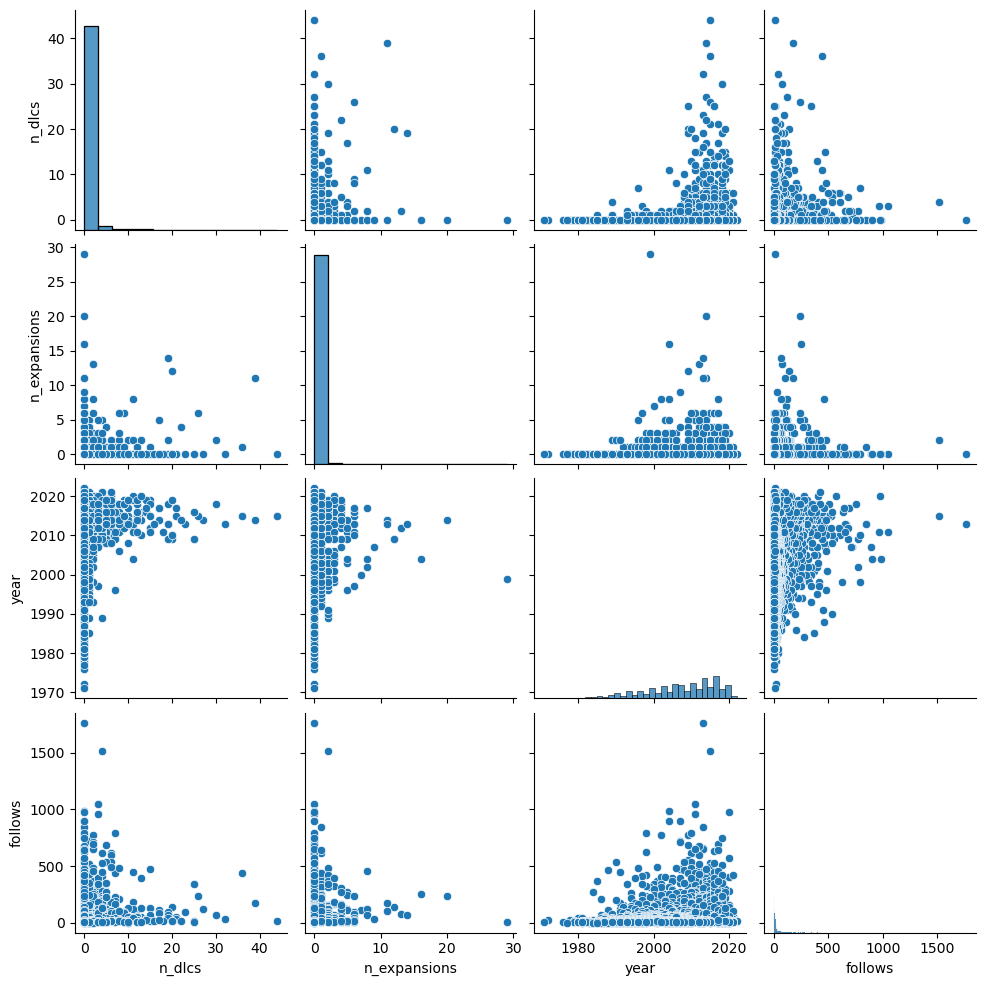

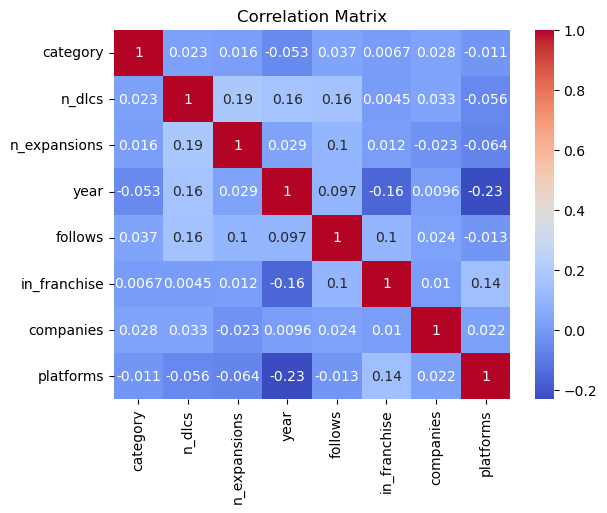

<Figure size 1000x800 with 0 Axes>

In [119]:
import seaborn as sns

# Gráfico de dispersão em pares
sns.pairplot(features[['n_dlcs', 'n_expansions', 'year', 'follows', 'user_rating']])
plt.show()

# Mapa de calor da matriz de correlação
# Calcula a matriz de correlação
correlation_matrix = features.corr()

# Plota o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.figure(figsize=(10, 8))
plt.show()

Procurámos correlações que pudesssem haver entre os features do nosso dataset através daquela matriz de correlação, mas nenhuma correlação foi descoberta...

Analises e limpezas, vamos proceder à divisão Train / Test no nosso dataset. Temos de ter em consideração que temos alguns dados na forma de strings, o que não nos convem, e portanto temos de transformar esses dados para valores numericos. Podemos simplesmente usar novamente a função 'fit_transform()' da biblioteca 'sklearn.preprocessing', mas vamos inovar um pouco

In [120]:
target=games['user_rating']
Labels=LabelEncoder()                               #labelEncoder=LabelEncoder()  
label1=Labels.fit_transform(games['category'])
label2=games['n_dlcs']
label3=games['n_expansions']
label4=games['year']
label5=games['follows']
label6=Labels.fit_transform(games['in_franchise'])
label7=games['n_user_reviews']
label8=Labels.fit_transform(games['companies'])
label9=Labels.fit_transform(games['platforms'])

features=pd.DataFrame(list(zip(label1,label2,label3,label4,label5,label6,label7,label8,label9)),columns=['category','n_dlcs','n_expansions','year','follows','in_franchise','n_user_reviews','companies','platforms'])

Não usámos a coluna "user_score" pois,  no fundo, essa coluna está resumida na coluna "user_rating"

### Divisão Train / Test 

training_inputs: dados todos,onde vou buscar dados
testing_inputs:dados escolhidos de maneira random para testar, 15% do features_train
training_classes:resultados obtidos do teste
testing_classes:resultados que queremos obter com o treino
test_size:=0.25-percentagem de dados do featurs_train que vamos utilizar, em percentagem

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features, target, test_size=0.25, random_state=1)

#  Modelos de aprendizagem

#  >> Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.6002775850104094

''

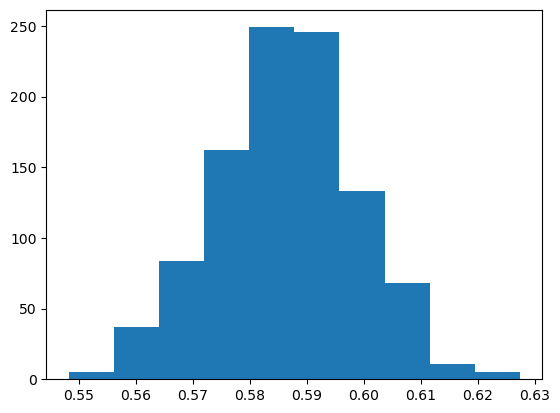

In [123]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(features, target, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

    
plt.hist(model_accuracies)
;

O nosso foco agora estará em maximizar a precisão da nossa Arvore de Decisão. Para isso começaremos por ajustar hiperpâmetros
como a profundidade maxima da árvore, o critério de divisão e o número minimo de amostras necessárias para dividir um nó.
Para isso usaremos um algoritmo de pesquisa em grade, o GridSearch

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir os hiperparâmetros a serem ajustados
parameters = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Criar o classificador de árvore de decisão
decision_tree_classifier = DecisionTreeClassifier()

# Realizar a pesquisa em grade
grid_search = GridSearchCV(decision_tree_classifier, parameters, cv=5)
grid_search.fit(training_inputs, training_classes)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

# Criar um novo classificador com os melhores hiperparâmetros
best_decision_tree_classifier = DecisionTreeClassifier(**best_params)

# Treinar o classificador com os melhores hiperparâmetros
best_decision_tree_classifier.fit(training_inputs, training_classes)

# Fazer previsões no conjunto de teste
predictions = best_decision_tree_classifier.predict(testing_inputs)

# Calcular a precisão do modelo
accuracy = accuracy_score(testing_classes, predictions)
print("Acuracy: {:.2f}%".format(accuracy * 100))




Melhores hiperparâmetros encontrados: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}
Acuracy: 63.98%


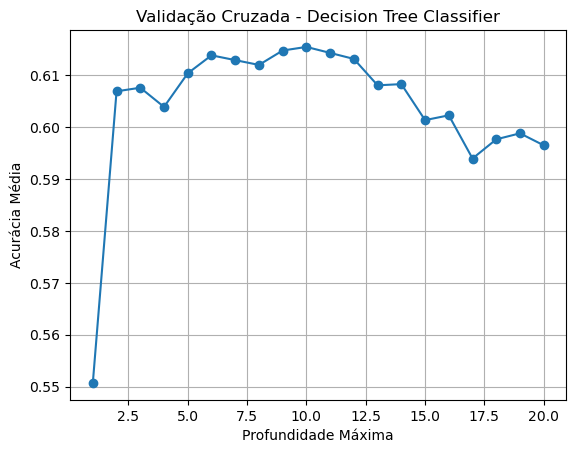

In [126]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Defina uma lista de possíveis profundidades máximas da árvore
depths = list(range(1, 21))

# Inicialize uma lista para armazenar as acurácias médias para cada profundidade
accuracy_scores = []

# Realize a validação cruzada para cada profundidade
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(tree, training_inputs, np.array(training_classes).ravel(), cv=5)
    accuracy_scores.append(scores.mean())

# Plote o gráfico da validação cruzada
plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia Média')
plt.title('Validação Cruzada - Decision Tree Classifier')
plt.grid(True)
plt.show()

Parece que a maior accuaracy obtem se em profundidades de 8 e 5, vamos testar...

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Criar e treinar a árvore de decisão com profundidade máxima de 5
tree_depth_5 = DecisionTreeClassifier(max_depth=5)
tree_depth_5.fit(training_inputs, np.array(training_classes).ravel())

# Realizar previsões nos dados de teste
predictions_depth_5 = tree_depth_5.predict(testing_inputs)

# Calcular e imprimir a acurácia
accuracy_depth_5 = accuracy_score(testing_classes, predictions_depth_5)
print("Acuracy: {:.2f}%".format(accuracy_depth_5 * 100))

# Criar e treinar a árvore de decisão com profundidade máxima de 8
tree_depth_8 = DecisionTreeClassifier(max_depth=8)
tree_depth_8.fit(training_inputs, np.array(training_classes).ravel())

# Realizar previsões nos dados de teste
predictions_depth_8 = tree_depth_8.predict(testing_inputs)

# Calcular e imprimir a acurácia
accuracy_depth_8 = accuracy_score(testing_classes, predictions_depth_8)
print("Acuracy: {:.2f}%".format(accuracy_depth_8 * 100))


best_decision_tree_classifier = tree_depth_5

Acuracy: 64.89%
Acuracy: 63.91%


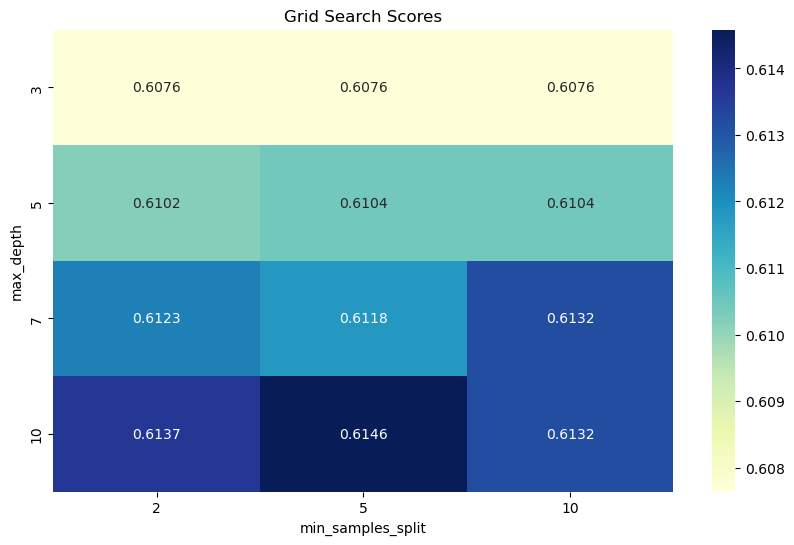

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem ajustados
parameters = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Criar o classificador de árvore de decisão
decision_tree_classifier = DecisionTreeClassifier()

# Realizar a pesquisa em grade
grid_search = GridSearchCV(decision_tree_classifier, parameters, cv=5)
grid_search.fit(training_inputs, training_classes)

# Obter os resultados da pesquisa em grade
results = pd.DataFrame(grid_search.cv_results_)

# Extrair os hiperparâmetros e pontuações
param_columns = ['param_max_depth', 'param_min_samples_split']
score_columns = ['mean_test_score', 'std_test_score']

# Criar uma grade de pontuações usando pivot_table
score_grid = pd.pivot_table(results, values=score_columns, index=param_columns)

# Reshape a grade de pontuações
score_grid = score_grid['mean_test_score'].unstack()

# Criar um mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(score_grid, annot=True, fmt='.4f', cmap='YlGnBu')

# Definir os rótulos dos eixos
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

# Definir o título do gráfico
plt.title('Grid Search Scores')

# Mostrar o gráfico
plt.show()

Vamos analisar o relevo que cada feature tem no nosso algoritmo ...

In [129]:
def importance(classifier, threshold=0):
    importance = pd.DataFrame({'feature': training_inputs.columns,
                               'importance': np.round(classifier.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    filtered_importance = importance[importance.importance > threshold]
    return filtered_importance

In [130]:
importance(best_decision_tree_classifier)

,feature,importance
6,n_user_reviews,0.395
4,follows,0.223
3,year,0.186
0,category,0.135
7,companies,0.031
8,platforms,0.030


 Com base na análise das importâncias das características fornecidas, observou-se que "n_user_reviews" tinha a maior importância, com um valor de 0.464. Isso indicava que essa feature tinha uma influência significativa nas decisões tomadas pelo modelo. Vamos experimentar a sua remoção  e ver se isso melhora  a accuaracy da nossa árvore...

In [131]:
target=games['user_rating']
Labels=LabelEncoder()                               #labelEncoder=LabelEncoder()  
label1=games['category']
label2=games['n_dlcs']
label3=games['n_expansions']
label4=games['year']
label5=games['follows']
label6=Labels.fit_transform(games['in_franchise'])
label8=Labels.fit_transform(games['companies'])
label9=Labels.fit_transform(games['platforms'])

features=pd.DataFrame(list(zip(label1,label2,label3,label4,label5,label6,label8,label9)),columns=['category','n_dlcs','n_expansions','year','follows','in_franchise','companies','platforms'])

from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.5711311589174185

Falso alarme! Ao remover o "n_user_reviews" a accuary diminui, ou seja, este parametro é importante no nosso dataset e portanto 
iremos mantê-lo....


parece que chegamos ao valor máximo de accuracy que conseguimos... 64,89%



Testemos outro método de classificação, o k-nearest Neighbours...

## KNN Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


knn=KNeighborsClassifier()
knn=knn.fit(training_inputs,np.array(training_classes).ravel())
knn.score(testing_inputs,testing_classes)

0.57529493407356

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(training_inputs, np.array(training_classes).ravel())

accuracy = knn.score(testing_inputs, testing_classes)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 58.08%


A accuracy aumentou, ainda que pouco...

Calculemos o numero de nos vizinhos ideiais para o nosso Algoritmo KNN

In [136]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Defina os valores dos parâmetros que deseja testar
parametros = {'n_neighbors': range(2, 20)}

# Crie uma instância do classificador KNN
knn = KNeighborsClassifier()

# Defina a estratégia de validação cruzada
cross_validation = StratifiedKFold(n_splits=10)

# Crie um objeto RandomizedSearchCV
random_search = RandomizedSearchCV(knn, parametros, n_iter=10, cv=cross_validation, n_jobs=-1)

# Ajuste o modelo com os dados de treinamento
random_search.fit(training_inputs, np.array(training_classes).ravel())

# Obtenha os melhores parâmetros encontrados
melhores_parametros = random_search.best_params_

# Use os melhores parâmetros para criar o classificador final
knn_final = KNeighborsClassifier(n_neighbors=melhores_parametros['n_neighbors'])

# Treine o classificador final com os dados de treinamento
knn_final.fit(training_inputs, np.array(training_classes).ravel())

# Calcule a acurácia do classificador final nos dados de teste
accuracy = knn_final.score(testing_inputs, testing_classes)

# Imprima a acurácia
print("Accuracy: {:.2f}%".format(accuracy * 100))

C:\Users\gjoli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 58.08%


A acuracy manteve-se inálterável praticamente...

In [70]:
features

,category,n_dlcs,n_expansions,year,follows,in_franchise,n_user_reviews,companies,platforms
0,6,0,0,2013,1766,1,3369,2994,733
1,6,4,2,2015,1516,1,2997,4141,780
2,6,3,0,2011,1046,0,2567,491,669
3,6,3,0,2011,963,1,2544,4056,229
4,6,0,0,2007,894,1,2297,4054,230
...,...,...,...,...,...,...,...,...,...
5756,6,0,0,2005,5,0,11,1841,411
5757,6,0,0,2001,11,0,11,3518,449
5758,6,0,0,2003,1,0,11,1167,449
5759,4,0,0,2006,8,1,11,1843,411


# CONCLUSIONS

Está na altura de testar e avaliar as previsões geradas pelos nossos algoritmos de aprendizagem. Vamos analisar esses resultados com uma matriz de confusão...

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def confusion_matrix_draw(classifier):
    y_true = np.array(games['user_rating'])
    y_pred = predict_array(classifier)
    cf = confusion_matrix(y_true, y_pred)
    
    g = sns.heatmap(cf, annot=True, cmap='Blues')
    g.set_title('Confusion Matrix')
    g.set_xlabel('\nPredicted Values')
    g.set_ylabel('Actual Values')
    g.xaxis.set_ticklabels(['Bad', 'Good', 'Great', 'Mediocre'])
    g.yaxis.set_ticklabels(['Bad', 'Good', 'Great', 'Mediocre'])
    plt.show()

def predict_array(classifier):
    n=len(features)
    pred_column=[]*(n+1)
    for i in range(0,n):
        pred_column.append(classifier.predict(features.iloc[[i]]))
    return pd.DataFrame(pred_column, columns = ['rating'])


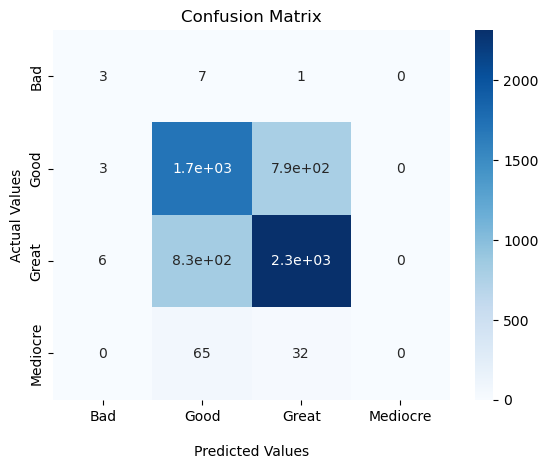

In [93]:
confusion_matrix_draw(knn_final)

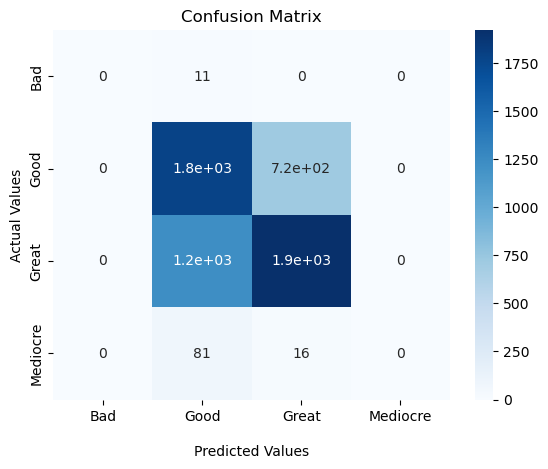

In [94]:
confusion_matrix_draw(best_decision_tree_classifier)

In [ ]:
Não é clara a análise destas matrizes de confusão, procedamos a uma análise mais simples e clara

In [95]:
n_great=games['user_rating'].value_counts("")[0]
n_good=games['user_rating'].value_counts("")[1]
n_medium=games['user_rating'].value_counts("")[2]
n_bad=games['user_rating'].value_counts("")[3]
total=n_great+n_good+n_medium+n_bad
n_great_percent=round((100*n_great)/total, 2)
n_good_percent=round((100*n_good)/total, 2)
n_medium_percent=round((100*n_medium)/total, 2)
n_bad_percent=round((100*n_bad)/total, 2)

real_stats=pd.DataFrame( columns = ['','Number:','Percentage:'])
real_stats.at[0,''] = "Sum of    'great's:"
real_stats.at[1,''] = "Sum of    'good's:"
real_stats.at[2,''] = "Sum of    'medium's:"
real_stats.at[3,''] = "Sum of    'bad's:"
real_stats.at[0,'Number:'] = n_great
real_stats.at[1,'Number:'] = n_good
real_stats.at[2,'Number:'] = n_medium
real_stats.at[3,'Number:'] = n_bad
real_stats.at[0,'Percentage:'] = str(n_great_percent)+"%"
real_stats.at[1,'Percentage:'] = str(n_good_percent)+"%"
real_stats.at[2,'Percentage:'] = str(n_medium_percent)+"%"
real_stats.at[3,'Percentage:'] = str(n_bad_percent)+"%"
real_stats.style.hide_index()

,Number:,Percentage:
Sum of 'great's:,3153,54.73%
Sum of 'good's:,2500,43.4%
Sum of 'medium's:,97,1.68%
Sum of 'bad's:,11,0.19%


Estes são as percentagens às quais os nossos modelos de classificação se deveriam aproximar, veremos...

In [103]:
def percentage(classifier):
    our_df = pd.DataFrame(games[['id', 'name']], columns=['id', 'name', 'user_rating'])
    n = len(features)  
    pred_column = []
    for i in range(0, n):
        pred_column.append(classifier.predict(features.iloc[[i]]))
    pred_column = pd.DataFrame(pred_column, columns=['user_rating'])
    our_df['user_rating'] = pred_column['user_rating']
    
    n_rate = np.array([["great", 0],
                      ["good", 0],
                      ["medium", 0],
                      ["bad", 0]], dtype=object)  
    
    for i in range(0, 4):
        try:
            n_rate[i][1] = int(our_df['user_rating'].value_counts()[i])  
        except:
            n_rate[i][1] = 0
    
    total = sum(n_rate[:, 1])
    for i in range(0, 4):
        n_rate[i][1] = round((100 * n_rate[i][1]) / total, 2)
    
    stats = pd.DataFrame(columns=['', 'Our Percentage:', 'Percentage:'])
    stats.at[0, ''] = "Sum of 'great's:"
    stats.at[1, ''] = "Sum of 'good's:"
    stats.at[2, ''] = "Sum of 'medium's:"
    stats.at[3, ''] = "Sum of 'bad's:"
    
    for i in range(0, 4):
        stats.at[i, 'Our Percentage:'] = str(n_rate[i][1]) + "%"
        stats.at[i, 'Percentage:'] = real_stats.at[i, 'Percentage:']
    
    return stats




In [104]:
percentage(best_decision_tree_classifier)

,,Our Percentage:,Percentage:
0,Sum of 'great's:,53.74%,54.73%
1,Sum of 'good's:,46.26%,43.4%
2,Sum of 'medium's:,0.0%,1.68%
3,Sum of 'bad's:,0.0%,0.19%


In [105]:
percentage(knn_final)

,,Our Percentage:,Percentage:
0,Sum of 'great's:,54.72%,54.73%
1,Sum of 'good's:,45.07%,43.4%
2,Sum of 'medium's:,0.21%,1.68%
3,Sum of 'bad's:,0.0%,0.19%
